# Importing Necessary Libraries

# STUDENT ID:13146946
# Name: Chaitanya Sai Kumar Tummalapalli

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import IPython.display
import PIL.Image
import psutil,os
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical

# Loading Dataset

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Data Exploration and Analysis

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
classes = {0 : "T-shirt/top",
        1 : "Trouser", 
        2 : "Pullover", 
        3 : "Dress", 
        4 : "Coat", 
        5 : "Sandal", 
        6 : "Shirt", 
        7 : "Sneaker", 
        8 : "Bag", 
        9 : "Ankle boot"}
print("The target classes for the classification task are:")
for key in classes.keys():
  print(str(key) + " : " + classes[key])

The target classes for the classification task are:
0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankle boot


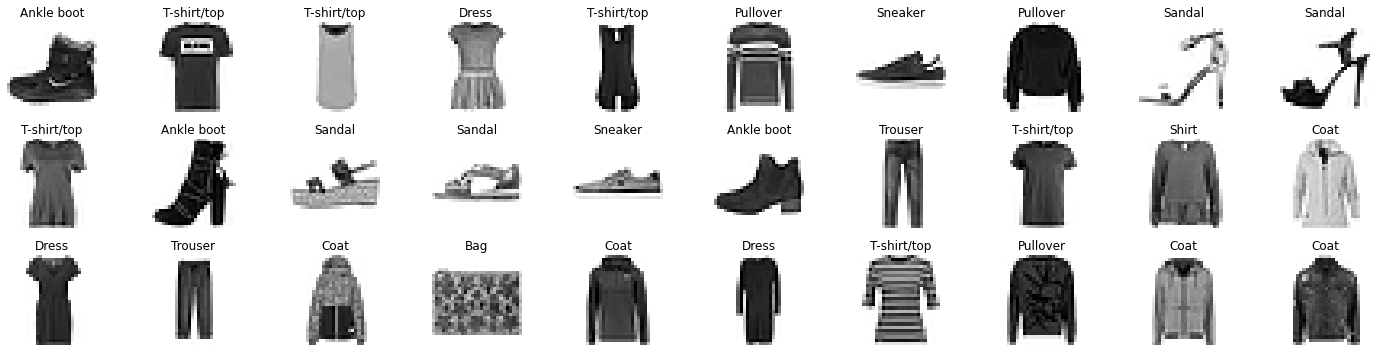

In [7]:
plt.figure(figsize = (20, 5))
plot = 1

for i in range(31):
    if plot < 31:
        ax = plt.subplot(3, 10, plot)
        plt.imshow(train_images[i], cmap = 'binary')
        plt.axis('off')
        plt.title(classes[train_labels[i]], fontdict = {'fontsize'  : 12, 'color' : 'black'})
        
    plot += 1
  
plt.tight_layout()
plt.show()

# Data Preprocessing

In [8]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [9]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Model Training and Results

In [10]:
model = models.Sequential([
    layers.Flatten(input_shape = [28, 28, ]),
    layers.Dense(300, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(200, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1

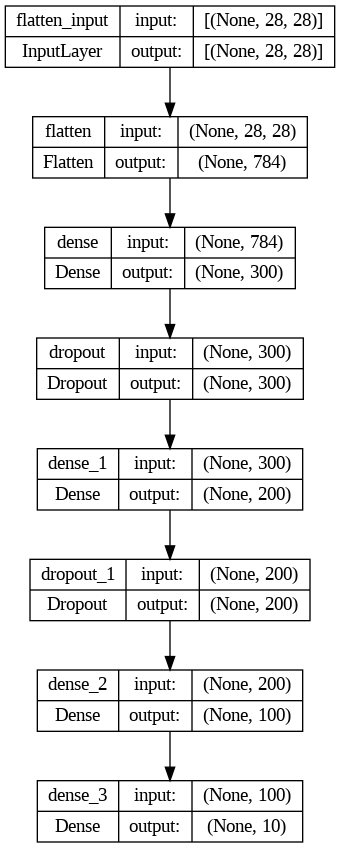

In [11]:
plot_model(model, show_shapes = True)

In [12]:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [13]:
model_history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5767 - accuracy: 0.7905 - val_loss: 0.4569 - val_accuracy: 0.8363
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4376 - accuracy: 0.8407 - val_loss: 0.4213 - val_accuracy: 0.8460
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4027 - accuracy: 0.8527 - val_loss: 0.3718 - val_accuracy: 0.8669
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3809 - accuracy: 0.8613 - val_loss: 0.3688 - val_accuracy: 0.8653
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3645 - accuracy: 0.8675 - val_loss: 0.3720 - val_accuracy: 0.8667
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3511 - accuracy: 0.8702 - val_loss: 0.3521 - val_accuracy: 0.8756
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3435 - accuracy: 0.8738 - val_loss: 0.3395 - val_accurac

In [14]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_accuracy)
print('Test loss: ',test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8812
Test Accuracy:  0.8812000155448914
Test loss:  0.33694398403167725


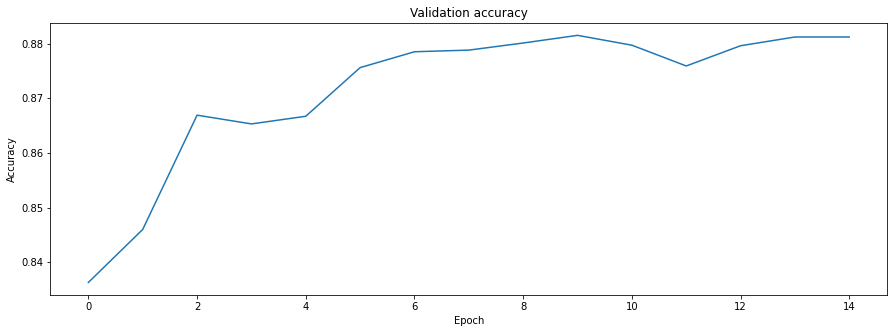

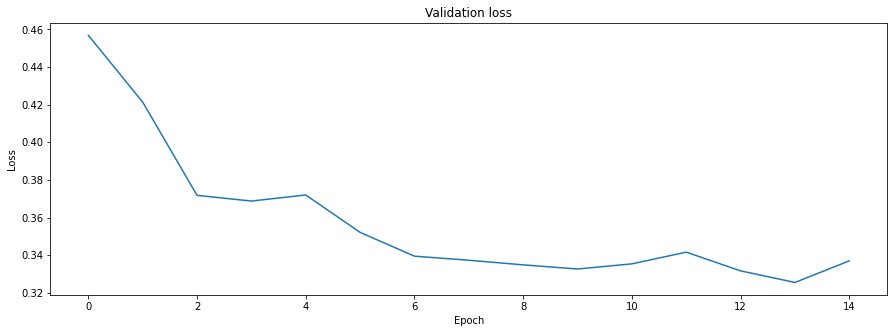

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(model_history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(model_history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()